In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrpantherson/board-game-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/marcinogrodniczuk/.cache/kagglehub/datasets/mrpantherson/board-game-data/versions/6


In [31]:
import os

path = "/Users/marcinogrodniczuk/.cache/kagglehub/datasets/mrpantherson/board-game-data/versions/6"
print(os.listdir(path))


['bgg_db_1806.csv', 'bgg_db_2017_04.csv', 'bgg_db_2018_01.csv']


In [32]:
#Get Data and standard imports 
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

file_path = os.path.join(path, "bgg_db_1806.csv")
board_games = pd.read_csv(file_path)
board_games.head()


,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,8.98893,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66140,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,8.38461,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,8.33954,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518


In [40]:
# Basic cleaning
board_games = board_games[board_games['avg_rating'] >0]

In [42]:
#Define Problem 
# Target: good game if rating >= 7.5
board_games['good_game'] = (board_games['avg_rating'] >= 7.5).astype(int)

In [46]:
#Feature selection 
numerical_features = ['min_players', 'max_players',	'avg_time',	'min_time',	'max_time', 'year']
categorical_features = ['category', 'mechanic']

In [48]:
#drop missing values from the selected features 
board_games = board_games.dropna(subset=numerical_features + categorical_features)

In [52]:
# Encode Categorical features 
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder_cats = encoder.fit_transform(board_games[categorical_features])

In [56]:
# combine numerical and categorical attributes and define target and features 
X = np.hstack([board_games[numerical_features].values, encoder_cats]) #features
y = board_games['good_game'] #target 

In [62]:
# make a training and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)

In [64]:
#Train the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
# Evaluate the model
y_pred = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       832
           1       0.58      0.38      0.46       168

    accuracy                           0.85      1000
   macro avg       0.73      0.66      0.68      1000
weighted avg       0.83      0.85      0.84      1000



/var/folders/hq/4zc23ktd6d5d8g4mygfzdn4h0000gn/T/ipykernel_88869/1683292652.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


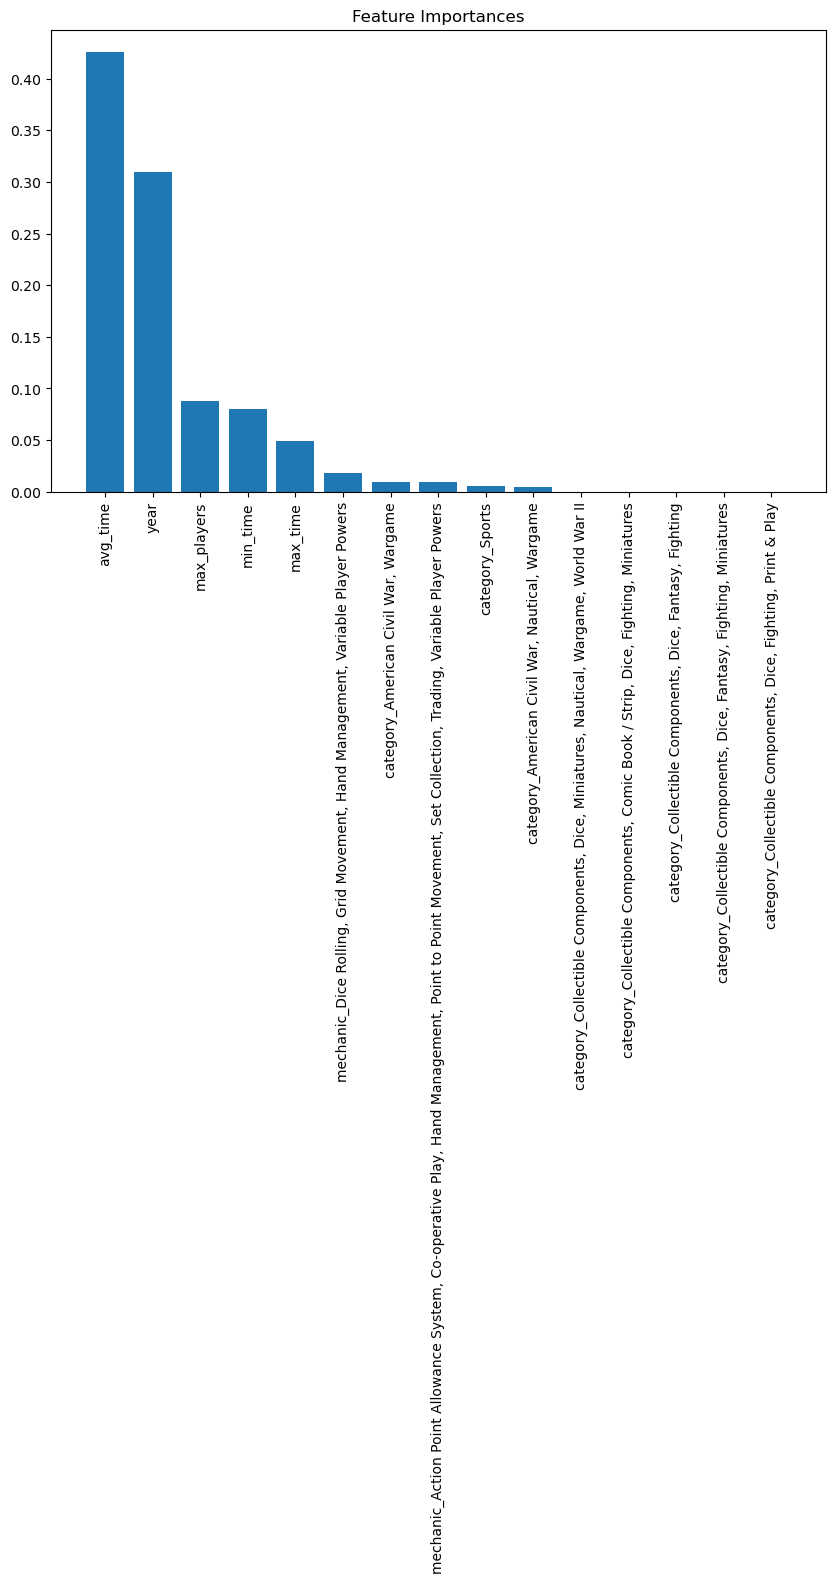

In [72]:
#  Feature importance
all_feature_names = numerical_features + list(encoder.get_feature_names_out(categorical_features))
importances = tree_clf.feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(15), importances[indices][:15], align='center')  # top 15
plt.xticks(range(15), [all_feature_names[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.show()
